In [147]:
'''Jacobi and Gauss-seidel methods'''

'Jacobi and Gauss-seidel methods'

In [148]:
import numpy
from matplotlib import pyplot

In [177]:
# Initialize grid
nx = 5
ny = 5
delta = 0.25

x = numpy.linspace(0.0,1.0, nx)
y = numpy.linspace(0.0,1.0, ny)
u0 = numpy.zeros((ny,nx))
f = u0.copy()
f = f+0.5
u0[:,0] = 1.0
u0[-1,:] = 1.0
u0[0,:] = 1.0
f

array([[0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5]])

In [246]:
def jacobi2d(u0, delta, f, tol = 1e-6, maxiter=10000):
    
    u = u0.copy()
    diff = tol+1
    ite = 0
    while diff > tol and ite < maxiter:
        un = u.copy()
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                u[j, i] = 0.25*(un[j-1,i] + un[j+1,i] + un[j,i+1] +
                                un[j,i-1]-f[j,i])
        diff = numpy.linalg.norm(u-un)/numpy.linalg.norm(un)
        ite += 1
    return u, ite
            
    

In [247]:
ans1, count1 = jacobi2d(u0, delta, f)
count1

34

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

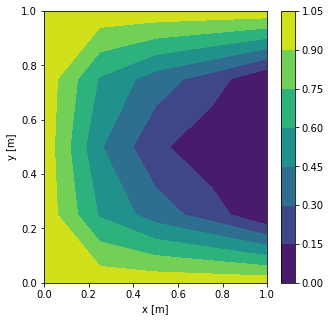

In [248]:
# Plot the filled contour of the temperature.
pyplot.figure(figsize=(5.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
contf = pyplot.contourf(x, y, ans1)
cbar = pyplot.colorbar(contf)
u0

In [249]:
def poisson2d_gauss_seidel(u0, f, maxiter=20000, tol=1e-6):
    u = u0.copy()
    diff = tol+1
    ite = 0
    while diff > tol and ite < maxiter:
        un = u.copy()
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                u[i,j] = 0.25 * (u[i-1,j] + u[i+1,j] + 
                                 u[i,j-1] + u[i,j+1] - f[i,j])
        diff = numpy.linalg.norm(u-un)/numpy.linalg.norm(un)
        ite += 1
    
    return u, ite

In [250]:
ans2, count = poisson2d_gauss_seidel(u0,f)

19


array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

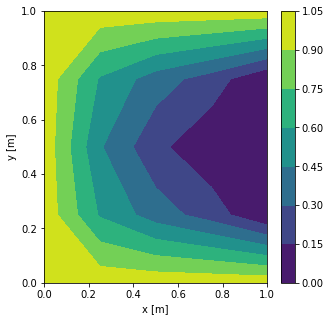

In [251]:
pyplot.figure(figsize=(5.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
contf = pyplot.contourf(x, y, ans2)
cbar = pyplot.colorbar(contf)
print(count)
u0

In [252]:
def sor(u0, f, omega=0.9, maxiter=10000, tol=1e-6):
    u = u0.copy()
    diff = tol+1
    ite = 0
    while diff > tol and ite < maxiter:
        un = u.copy()
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                u[i,j] = ((1-omega)*un[j,i] +
                          0.25*omega*(u[i-1,j] +
                                      u[i,j-1] +
                                      un[i,j+1]+
                                      un[i+1,j]-
                                      f[i,j]))
        diff = numpy.linalg.norm(u-un)/numpy.linalg.norm(un)
        ite += 1
    return u, ite

In [253]:
ans3, count2 = sor(u0,f)

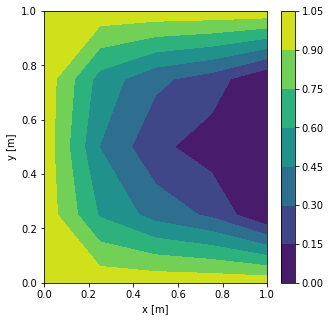

In [254]:
pyplot.figure(figsize=(5.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
contf = pyplot.contourf(x, y, ans3)
cbar = pyplot.colorbar(contf)


In [223]:
import numba
from numba import jit

In [ ]:
@jit(nopython=True)
def gs_fancy_jit(u,b,iters):